# Logistic Regression (including Regularization)

Recreation of Andrew Ng Octave course 
using Python Jupyter Notebook by Alek Zdziarski

In [3]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import csv data
PATH="/Users/alek/OneDrive/Projects/Courses/Machine Learning Andrew Ng, Stanford, Coursera/ex2 Logistic Regression/ex2/"
DATA1="ex2data1.txt"
DATA2="ex2data2.txt"
from numpy import genfromtxt
data1 = genfromtxt(f'{PATH}{DATA1}', delimiter=',')
data1.shape

(100, 3)

In [5]:
X = data1[:, [0, 1]]
y = data1[:, [2]]
X.shape, y.shape

((100, 2), (100, 1))

## Part 1: Plotting

In [6]:
def plot_data(X, y):
    one_rows = np.where(y==1)
    zero_rows = np.where(y==0)
    
    plt.plot(X[zero_rows[0],0],X[zero_rows[0],1],'bo', markersize=6, markerfacecolor='b', label='Not Admitted')
    plt.plot(X[one_rows[0],0],X[one_rows[0],1],'r+', markersize=9, linewidth=2, label = 'Admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    #plt.legend(['zero results - not admitted', 'one results - admitted'], loc='lower left')
    plt.legend( bbox_to_anchor=(1, 0.5)) # this got it outside the graph

    plt.grid(which='both')
    

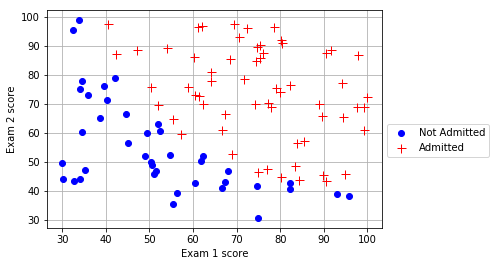

In [7]:
plot_data(X,y)
plt.show()

# Part 2: Compute Cost and Gradient 

In [8]:
(m,n) = X.shape
m, n

(100, 2)

In [9]:
# Add intercept term to x and X_test
ones=np.ones((m,1))
X = np.concatenate((ones, X), axis=1)

In [10]:
initial_theta = np.zeros((n + 1, 1))
initial_theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [11]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [12]:
def cost_function(theta, X, y):
    m = y.size
    polynomial = X@theta # going straight for all xs rather than x^(i) one by one
    hypothesis = sigmoid(polynomial)
    cost = -y*np.log(hypothesis)-(1-y)*np.log(1-hypothesis)
    J=np.mean(cost)
    grad = X.T@(hypothesis-y)/m
    #grad = grad.ravel();
    return J, grad


In [13]:
# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)

print(f'Cost at initial theta (zeros): {cost}')
print(f'Expected cost (approx): 0.693')
print(f'Gradient at initial theta (zeros):')
print(f' {grad}')
print(f'Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')


Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [14]:
test_theta = np.array([[-24], [0.2], [0.2]])
[cost, grad] = cost_function(test_theta, X, y)

In [15]:
print('\nCost at test theta: ', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta:  0.218330193827
Expected cost (approx): 0.218

Gradient at test theta:
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



# Part 3: Optimizing using fmin_tnc (fminunc on octave)

In [16]:
import scipy.optimize as opt  

In [17]:
#result = opt.fmin_tnc(cost_function, x0=initial_theta, args=(X, y))
def costf(theta, X, y):
    theta = theta.reshape((n+1,1))
    return cost_function(theta, X, y)[0]
def gradf(theta, X, y):
    theta = theta.reshape((n+1,1))
    #print(f'{theta} {theta.shape}')
    ret = cost_function(theta, X, y)[1]
    #print(f'{ret.shape} ret')
    return ret
#print(initial_theta)
result = opt.fmin_tnc(func=costf, x0=initial_theta, fprime=gradf, args=(X, y))
#result = opt.minimize(fun=costf, jac=gradf, x0=initial_theta, args=(X, y),method = 'TNC')

In [18]:
theta = result[0]
cost = costf(theta, X, y) 

print('Cost at theta found by fminunc equivalent fmin_tnc: %f\n', cost);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc equivalent fmin_tnc: %f
 0.203497701589
Expected cost (approx): 0.203

theta: 

[-25.16131863   0.20623159   0.20147149]
Expected theta (approx):

 -25.161
 0.206
 0.201



-25.1613186291


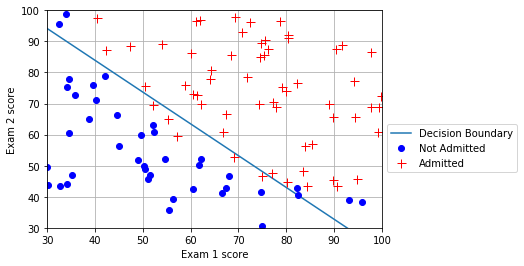

In [19]:
def plot_decision_boundary(theta, X, y):    
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
        #plot_x = [min(X(:,2))-2,  max(X(:,2))+2]
        # Calculate the decision boundary line
        #plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));
        
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
    
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, label='Decision Boundary')
        plt.axis([30, 100, 30, 100])

        
print(theta[0])
plot_decision_boundary(theta, X, y)
plot_data(X[:,1:3],y)
plt.show()

## Part 4: Predict and Accuracies

In [20]:
def predict(theta, X):
# PREDICT Predict whether the label is 0 or 1 using learned logistic
# regression parameters theta
#    p = PREDICT(theta, X) computes the predictions for X using a
#    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m=X.shape[0] # Number of training examples
    

    polynomial = X@theta # going straight for all xs rather than x^(i) one by one
    hypothesis = sigmoid(polynomial)
    return hypothesis>=0.5

In [21]:
prob = sigmoid(np.array([[1,45,85]]) @ theta)
print('For a student with scores 45 and 85, we predict an admission probability of ', prob);
print('Expected value: 0.775 +/- 0.002\n');

# Compute accuracy on our training set
print (X.shape, theta.shape)
p = predict(np.reshape(theta,(3,1)), X)

print('Train Accuracy: %f\n', np.mean((p == y)) * 100);
print('Expected accuracy (approx): 89.0\n');
print('\n');

For a student with scores 45 and 85, we predict an admission probability of  [ 0.77629062]
Expected value: 0.775 +/- 0.002

(100, 3) (3,)
Train Accuracy: %f
 89.0
Expected accuracy (approx): 89.0





## Logistic Regression with Regularization

### Part 1: Regularized Logistic Regression

In [22]:
data2 = genfromtxt(f'{PATH}{DATA2}', delimiter=',')
data2.shape

(118, 3)

In [23]:
X = data2[:, [0, 1]]
y = data2[:, [2]]
X.shape, y.shape

((118, 2), (118, 1))

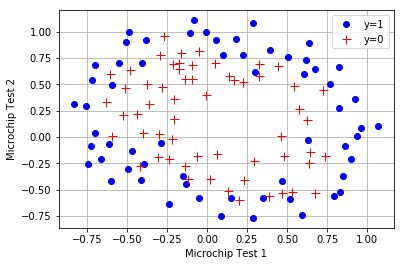

In [24]:
plot_data(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])
plt.show()

In [25]:
def map_feature(X1, X2, degree=6):
    
    #    function out = mapFeature(X1, X2)
    # MAPFEATURE Feature mapping function to polynomial features
    #
    #   MAPFEATURE(X1, X2) maps the two input features
    #   to quadratic features used in the regularization exercise.
    #
    #   Returns a new feature array with more features, comprising of 
    #   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    #
    #   Inputs X1, X2 must be the same size
    
    out = np.ones((X1.shape[0],1))
    for i in range(degree+1):
        for j in range(i+1):
            if (not(i==0 and j==0)):
                out = np.c_[out,(X1**(i-j))*X2**j]
    return out

In [26]:
X = map_feature(X[:,0], X[:,1])

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1));

# Set regularization parameter lambda to 1
Lambda = 10

In [27]:
def cost_function_reg(theta, X, y, Lambda):
    m = y.size
    polynomial = X@theta # going straight for all xs rather than x^(i) one by one
    hypothesis = sigmoid(polynomial)
    cost = -y*np.log(hypothesis)-(1-y)*np.log(1-hypothesis)
    #regularization
    n=theta.size-1 #not sure why this is -1 as I work through ex 3 so deleted there but left here as I seemed to be happy with it 
    regularization=Lambda/2/m*np.sum(theta[1:n]**2) #remember that we dont regularize theta_0 which is 1 indexed in octave

    J=np.mean(cost)+regularization
    
    grad = X.T@(hypothesis-y)/m
    grad_regularizations = Lambda/m*theta
    grad_regularizations[0] = 0 # remember we don't regularize our theta_0
    grad = grad + grad_regularizations
    
    return J, grad

In [28]:
cost, grad = cost_function_reg(initial_theta, X, y, Lambda)

In [29]:
print('Cost at initial theta (zeros): %f\n', cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print(f'{grad[0:5]}');
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');
print('\nProgram paused. Press enter to continue.\n');

Cost at initial theta (zeros): %f
 0.69314718056
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Program paused. Press enter to continue.



In [30]:
test_theta = np.ones((X.shape[1],1))
[cost, grad] = cost_function_reg(test_theta, X, y, 10);

In [31]:
print('\nCost at test theta (with lambda = 10): \n', cost);
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n');
print('\n', grad[0:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

print('\nProgram paused. Press enter to continue.\n');


Cost at test theta (with lambda = 10): 
 3.12213645026
Expected cost (approx): 3.16

Gradient at test theta - first five values only:


 [[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


Program paused. Press enter to continue.



### Part 2: Regularization and Accuracies

In [50]:
# Initialize fitting parameters
n = X.shape[1]
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1 (you should vary this)
Lambda = 1

def costf(theta, X, y):
    theta = theta.reshape((n,1))
    return cost_function_reg(theta, X, y, Lambda)[0]
def gradf(theta, X, y):
    theta = theta.reshape((n,1))
    ret = cost_function_reg(theta, X, y, Lambda)[1]
    return ret

result = opt.fmin_tnc(func=costf, x0=initial_theta, fprime=gradf, args=(X, y))
theta = result[0].reshape(result[0].size,1)
cost = costf(theta, X, y) 
theta.shape


(28, 1)

In [51]:
def plot_decision_boundary_reg(theta, X, y):
    #% Here is the grid range
    u = np.linspace(-1, 1.5, 50).reshape(1,50)
    v = np.linspace(-1, 1.5, 50).reshape(1,50)

    z = np.zeros((u.size, v.size))
    #% Evaluate z = theta*x over the grid
    for i in range (u.size):
        for j in range (v.size):
            z[i,j] = map_feature(u[0][i].reshape(1,1), v[0][j].reshape(1,1))@theta
            
    z = z.T # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the range 0
    print ("u, v, z", u.ravel().shape, v.ravel().shape, z.shape)
    plt.contour(v.ravel(), u.ravel(), z, 0)

u, v, z (50,) (50,) (50, 50)


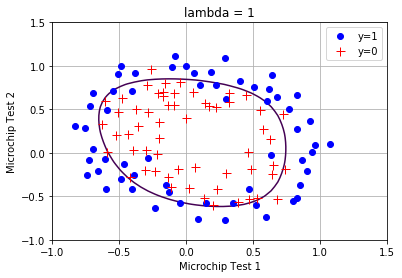

In [52]:
# Plot Boundary
plot_data(X[:,1:3],y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])
plot_decision_boundary_reg(theta, X, y);
plt.title(f'lambda = {Lambda}')
plt.show()